Importiamo le librerie Pandas e MatPlotLib

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
%matplotlib notebook

Leggiamo i dati con pandas 

In [21]:
df=pd.read_csv('TRIN-01from2019-11-10to2019-11-11.csv')

In [22]:
df.describe()

Theta  TimeOfFlight   TrackLength
count  4.166666e+06  4.166666e+06  4.166666e+06
mean   2.207730e+01  4.394696e+00  1.107003e+02
std    1.072917e+01  6.949080e-01  1.067967e+01
min    1.978200e-02  1.500000e-05  1.000000e+02
25%    1.385381e+01  3.949982e+00  1.029962e+02
50%    2.137384e+01  4.325012e+00  1.073857e+02
75%    2.952472e+01  4.799988e+00  1.149236e+02
max    5.825675e+01  7.999985e+00  1.900730e+02

Controlliamo i dati

In [23]:
df.head()

Theta  TimeOfFlight  TrackLength
0  11.073307      4.399994   101.897095
1   7.750587      4.299988   100.921974
2  20.430432      4.800018   106.712570
3  51.607654      6.750000   161.019424
4  25.057534      4.300018   110.389534

Introduciamo la colonna "velocità" come rapporto tra lunghezza di traccia e tempo di volo

In [24]:
df["velocita"]=df["TrackLength"]/df["TimeOfFlight"]

Prendiamo i dati con la lunghezza di traccia > 0

In [25]:
df_positivi=df[df["TimeOfFlight"]>0]

In [26]:
df_positivi

Theta  TimeOfFlight  TrackLength   velocita
0        11.073307      4.399994   101.897095  23.158462
1         7.750587      4.299988   100.921974  23.470292
2        20.430432      4.800018   106.712570  22.231702
3        51.607654      6.750000   161.019424  23.854729
4        25.057534      4.300018   110.389534  25.671877
...            ...           ...          ...        ...
4166661  24.151010      3.849976   109.592613  28.465791
4166662  14.299284      3.649994   103.197174  28.273245
4166663  15.423245      3.250000   103.735779  31.918701
4166664  14.772325      4.450012   103.418320  23.240009
4166665  29.682422      3.799988   115.103477  30.290484

[4166666 rows x 4 columns]

Rendiamo interi gli angoli così da creare le classi

In [27]:
df_positivi["Theta_int"]=df_positivi["Theta"].apply(int)

Controlo sulla congruità dei dati

In [28]:
df_positivi_filtrati= df_positivi[(df_positivi["TimeOfFlight"]<8) & (df_positivi["TrackLength"]<235) & (df_positivi["velocita"]<30)]


In [29]:
df_positivi_filtrati

Theta  TimeOfFlight  TrackLength   velocita  Theta_int
0        11.073307      4.399994   101.897095  23.158462         11
1         7.750587      4.299988   100.921974  23.470292          7
2        20.430432      4.800018   106.712570  22.231702         20
3        51.607654      6.750000   161.019424  23.854729         51
4        25.057534      4.300018   110.389534  25.671877         25
...            ...           ...          ...        ...        ...
4166659  23.861795      4.000000   109.346512  27.336628         23
4166660   7.092875      4.299988   100.771172  23.435222          7
4166661  24.151010      3.849976   109.592613  28.465791         24
4166662  14.299284      3.649994   103.197174  28.273245         14
4166664  14.772325      4.450012   103.418320  23.240009         14

[3785269 rows x 5 columns]

Rendiamo come index la colonna Theta-int

In [30]:
df_positivi_filtrati.set_index("Theta_int",inplace=True)

In [31]:
df_positivi_filtrati

Theta  TimeOfFlight  TrackLength   velocita
Theta_int                                                 
11         11.073307      4.399994   101.897095  23.158462
7           7.750587      4.299988   100.921974  23.470292
20         20.430432      4.800018   106.712570  22.231702
51         51.607654      6.750000   161.019424  23.854729
25         25.057534      4.300018   110.389534  25.671877
...              ...           ...          ...        ...
23         23.861795      4.000000   109.346512  27.336628
7           7.092875      4.299988   100.771172  23.435222
24         24.151010      3.849976   109.592613  28.465791
14         14.299284      3.649994   103.197174  28.273245
14         14.772325      4.450012   103.418320  23.240009

[3785269 rows x 4 columns]

In [32]:
df_positivi_filtrati.describe()

Theta  TimeOfFlight   TrackLength      velocita
count  3.785269e+06  3.785269e+06  3.785269e+06  3.785269e+06
mean   2.201306e+01  4.492505e+00  1.106943e+02  2.490026e+01
std    1.080780e+01  6.393007e-01  1.078855e+01  2.522362e+00
min    1.978200e-02  3.349960e+00  1.000000e+02  1.254519e+01
25%    1.369287e+01  4.049988e+00  1.029253e+02  2.319007e+01
50%    2.125120e+01  4.399994e+00  1.072961e+02  2.489537e+01
75%    2.951206e+01  4.849976e+00  1.149092e+02  2.672349e+01
max    5.825675e+01  7.999985e+00  1.900730e+02  3.000000e+01

In funzione di theta calcoliamo la media delle velocità, dei tempi di volo e delle lunghezze di traccia 

In [33]:
v_theta=df_positivi_filtrati.groupby("Theta_int")["velocita"].mean()
tof_theta=df_positivi_filtrati.groupby("Theta_int")["TimeOfFlight"].mean()
tl_theta=df_positivi_filtrati.groupby("Theta_int")["TrackLength"].mean()

In [34]:
v_theta.head(100)

Theta_int
0     25.055257
1     25.004507
2     24.998888
3     24.968040
4     25.000524
5     24.932797
6     24.890241
7     24.829046
8     24.904254
9     24.865014
10    24.906102
11    24.885770
12    24.862601
13    24.888161
14    24.841193
15    24.827464
16    24.781925
17    24.784456
18    24.764468
19    24.795292
20    24.799651
21    24.773408
22    24.816196
23    24.861673
24    24.849947
25    24.869012
26    24.880258
27    24.844814
28    24.893196
29    24.923617
30    24.954680
31    24.932755
32    24.978667
33    25.016672
34    25.024382
35    25.001471
36    25.018705
37    25.057602
38    25.060726
39    25.084668
40    25.105025
41    25.120078
42    25.146578
43    25.158137
44    25.184462
45    25.216651
46    25.250147
47    25.268004
48    25.277778
49    25.377664
50    25.330332
51    25.422972
52    25.479387
53    25.568035
54    25.715270
55    26.037185
56    26.541767
57    27.039774
58    25.343064
Name: velocita, dtype: float64

In [35]:
v_theta

Theta_int
0     25.055257
1     25.004507
2     24.998888
3     24.968040
4     25.000524
5     24.932797
6     24.890241
7     24.829046
8     24.904254
9     24.865014
10    24.906102
11    24.885770
12    24.862601
13    24.888161
14    24.841193
15    24.827464
16    24.781925
17    24.784456
18    24.764468
19    24.795292
20    24.799651
21    24.773408
22    24.816196
23    24.861673
24    24.849947
25    24.869012
26    24.880258
27    24.844814
28    24.893196
29    24.923617
30    24.954680
31    24.932755
32    24.978667
33    25.016672
34    25.024382
35    25.001471
36    25.018705
37    25.057602
38    25.060726
39    25.084668
40    25.105025
41    25.120078
42    25.146578
43    25.158137
44    25.184462
45    25.216651
46    25.250147
47    25.268004
48    25.277778
49    25.377664
50    25.330332
51    25.422972
52    25.479387
53    25.568035
54    25.715270
55    26.037185
56    26.541767
57    27.039774
58    25.343064
Name: velocita, dtype: float64

Plottiamo le lunghezze di traccia

<IPython.core.display.Javascript object>


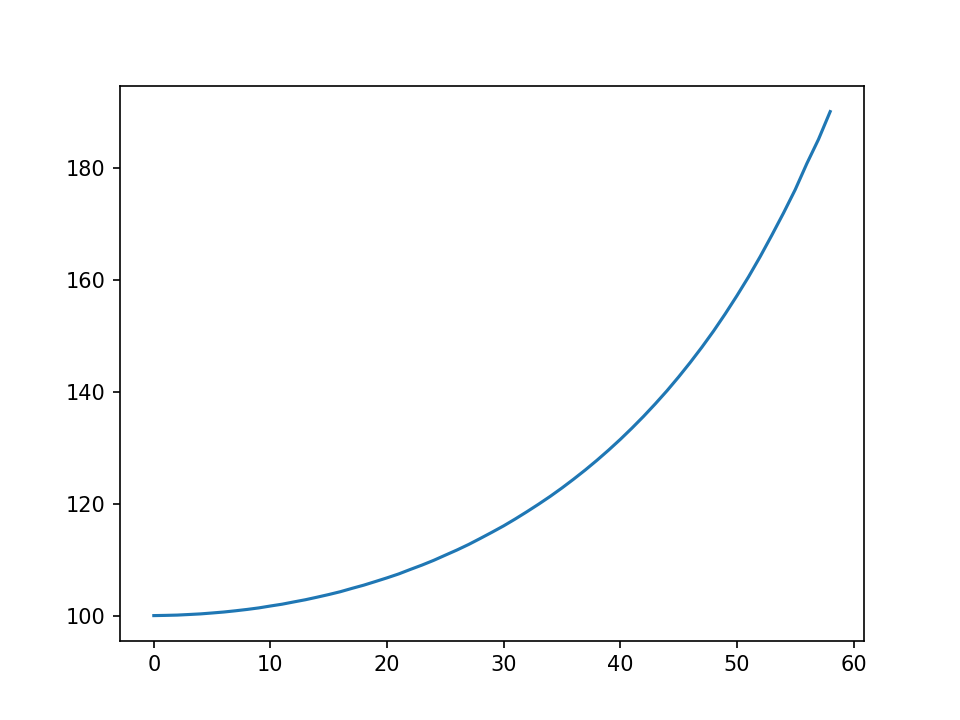

In [36]:
plt.figure()
plt.plot(tl_theta)
plt.title ="Track Length"

Plottiamo il tempo di volo

<IPython.core.display.Javascript object>


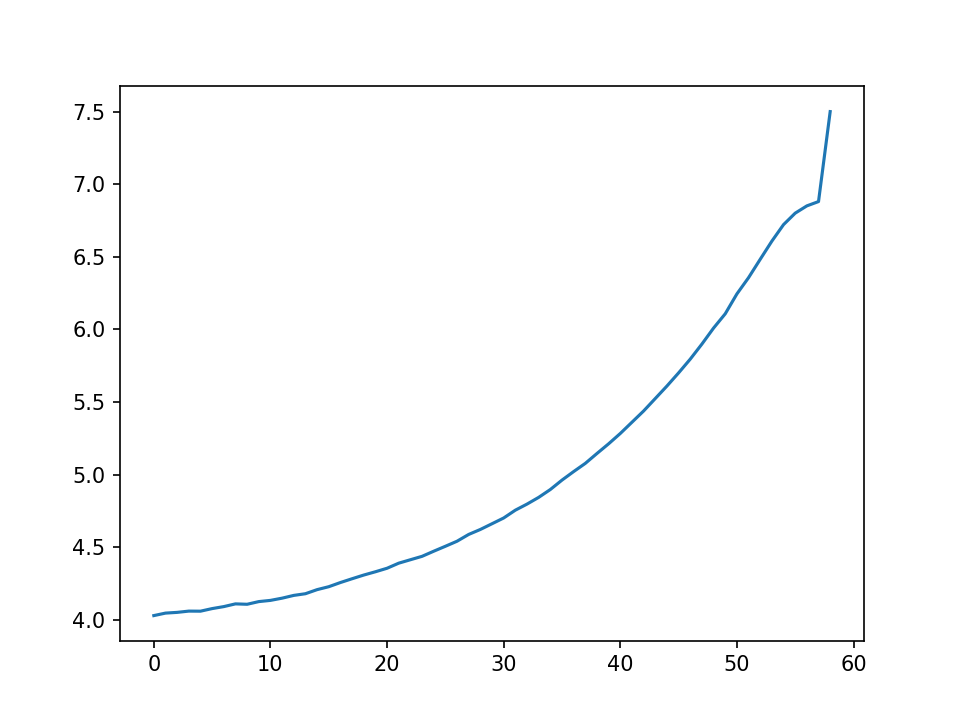

In [37]:
plt.figure()
plt.plot(tof_theta)
plt.title ="Time of Flight"

Plottiamo le velocità

<IPython.core.display.Javascript object>


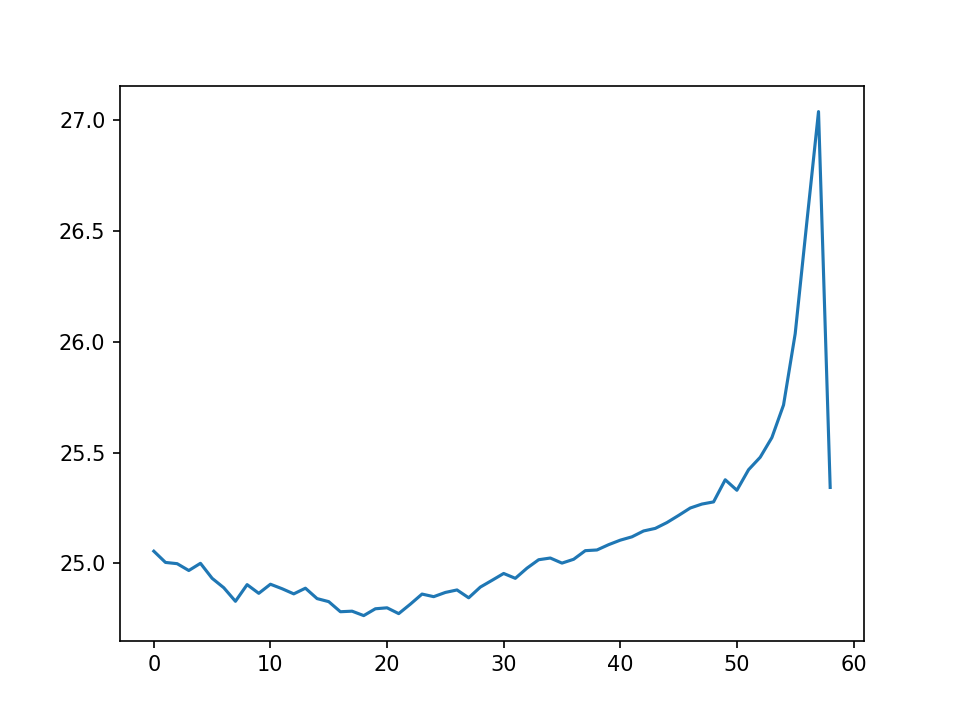

In [38]:
plt.figure()
plt.plot(v_theta)
plt.title ="velocità"